## **Practice PCA & K-Means**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('creditcard.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### **Feature information**

- CUSTID: Identification of Credit Card holder (Categorical)
- BALANCE: Balance amount left in their account to make purchases (
- BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES: Amount of purchase done in installment
- CASHADVANCE: Cash in advance given by the user
- PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX: Numbe of purchase transactions made
- CREDITLIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user
- PRCFULLPAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [20]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [21]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## **EDA**

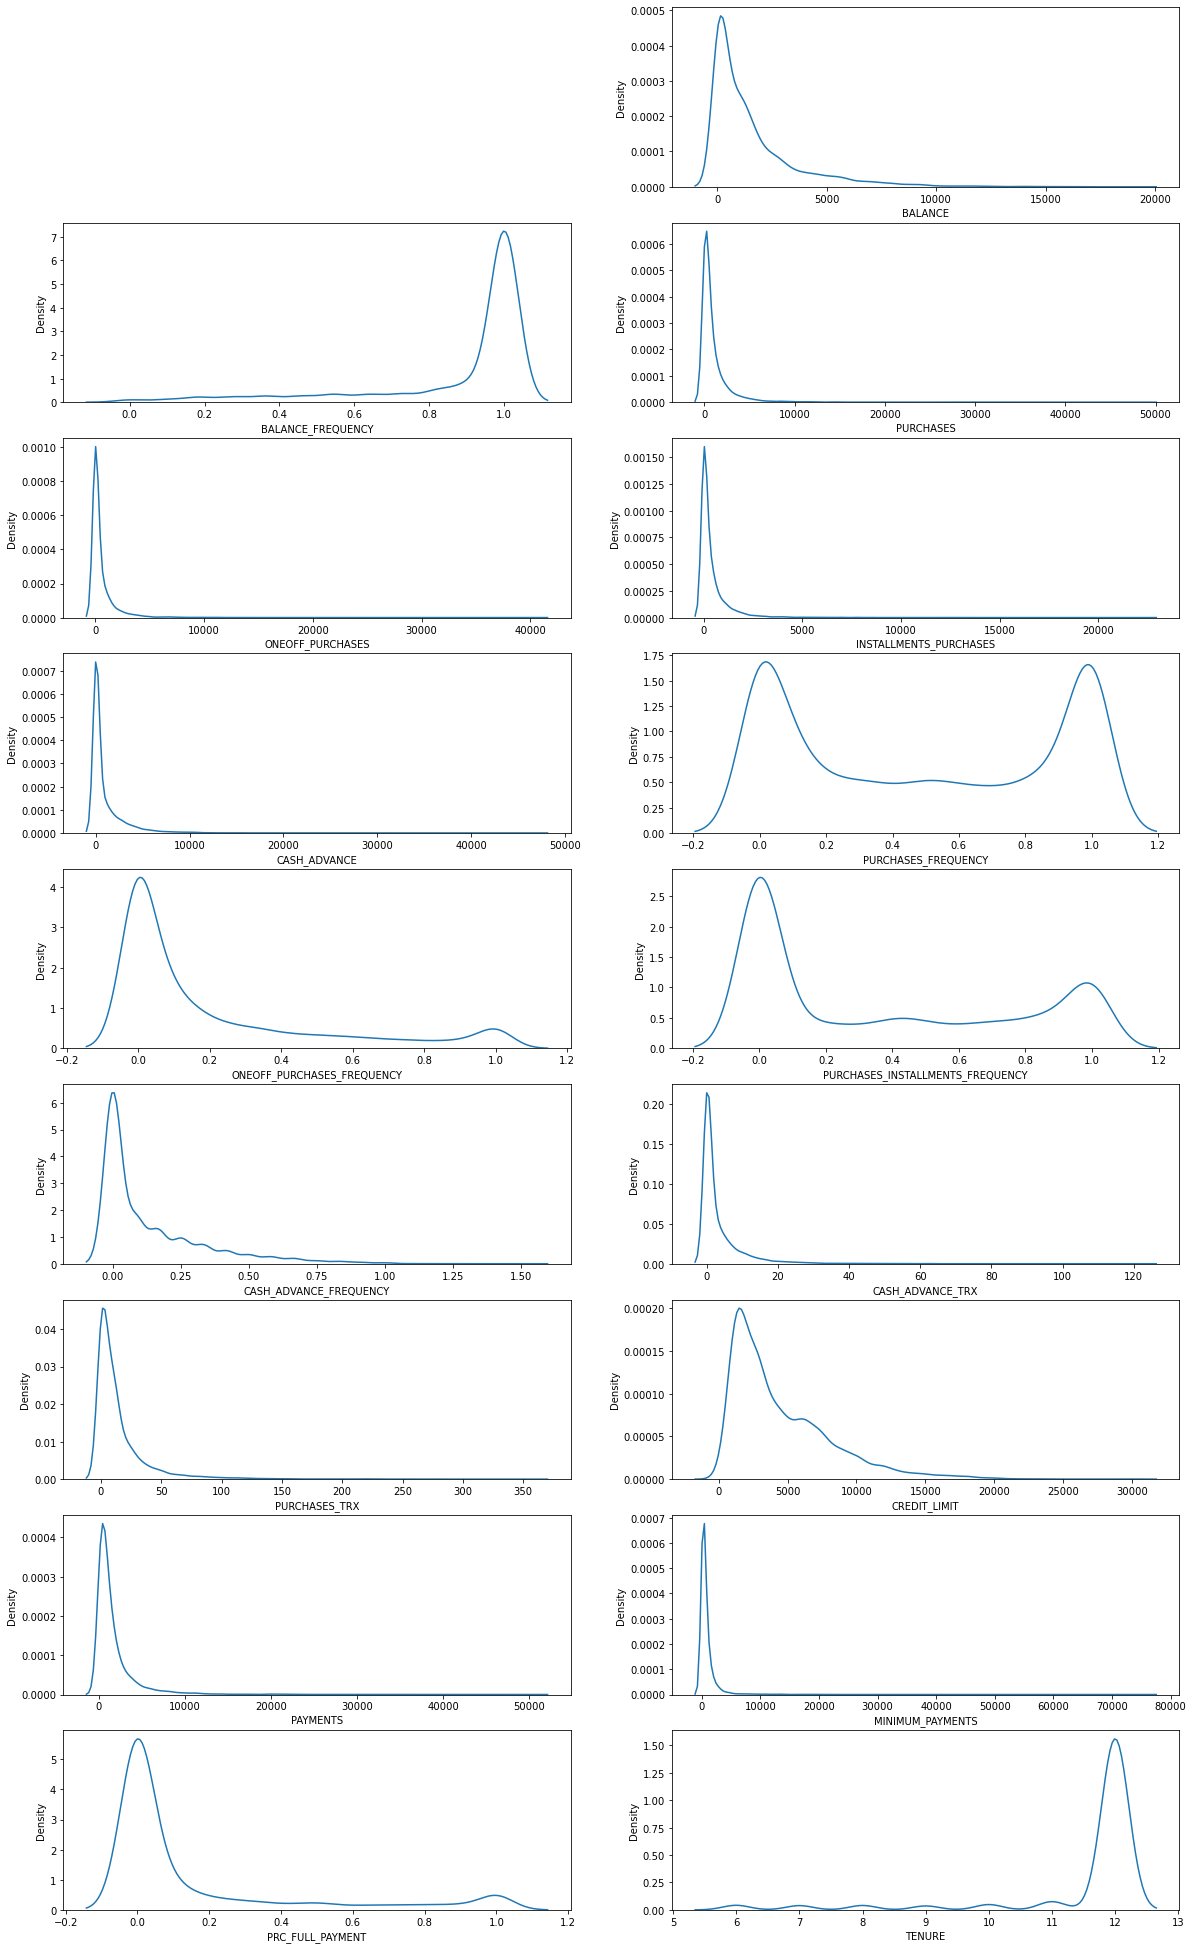

In [22]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

### **Interpretation**

There is skewness in all numerical features in this dataset. For clustering, of course we have to minimize skewness first so that later the model can make clusters more optimally.

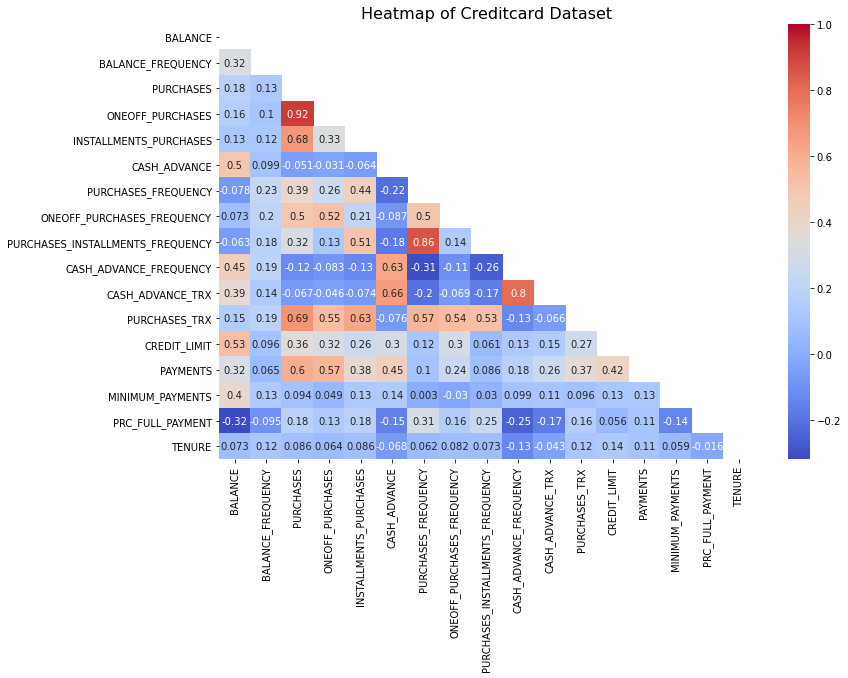

In [23]:
mask = np.zeros_like(df.corr()) 
mask[np.triu_indices_from(mask)]=True 

plt.figure(figsize=(12, 8))
plt.title('Heatmap of Creditcard Dataset', size=16)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, mask=mask, vmax=1);

### **Interpretation**

There are several features that have a high correlation. In other words, we can use the dimensionality reduction (PCA) method so that later the model input has smaller dimensions, but still contains almost the same information (maximum variance).

## **Data Preprocessing**

### **Drop CUST_ID**

Because Customer ID is a unique ID for each customer, this feature does not have an important role in determining the cluster later.

In [24]:
df.drop(['CUST_ID'], axis=1, inplace=True)

### **Drop missing value pada CREDIT_LIMIT**



In [25]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

### **Imputation of missing value in MINIMUM_PAYMENTS**

Because the distribution in MINIMUM_PAYMENTS does not follow the normal distribution (there is skewness), then imputing the missing value using the median value will give a better estimate of the value.

In [26]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

### **Scaling data**

In [27]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [28]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.columns
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302427,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097453,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093330,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228291,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257295,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.341275,1.183844,-4.126919
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.228291,-0.525588,-4.126919
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.326900,0.329128,-4.126919
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.338330,0.329128,-4.126919


In [29]:
df_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03
mean,5.156601e-16,-7.789463e-15,-2.110948e-15,-3.777680e-15,6.572386e-16,1.274902e-15,-5.085514e-16,1.090520e-14,2.254191e-16,9.593647e-17,7.993258e-16,-2.122376e-16,-7.897483e-16,7.491679e-16,1.541522e-16,1.583082e-15,6.247321e-15
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.517040e-01,-3.705263e+00,-4.695839e-01,-3.569565e-01,-4.546069e-01,-4.668054e-01,-1.221928e+00,-6.787162e-01,-9.170895e-01,-6.752945e-01,-4.760829e-01,-5.918405e-01,-1.221468e+00,-5.987332e-01,-3.622228e-01,-5.255884e-01,-4.126919e+00
25%,-6.900332e-01,4.873144e-02,-4.509562e-01,-3.569565e-01,-4.546069e-01,-4.668054e-01,-1.014290e+00,-6.787162e-01,-9.170895e-01,-6.752945e-01,-4.760829e-01,-5.516107e-01,-7.954817e-01,-4.663388e-01,-2.889810e-01,-5.255884e-01,3.605413e-01
50%,-3.319616e-01,5.179802e-01,-3.003952e-01,-3.340632e-01,-3.561912e-01,-4.668054e-01,2.390672e-02,-3.993831e-01,-4.977267e-01,-6.752945e-01,-4.760829e-01,-3.102316e-01,-4.107196e-01,-3.026846e-01,-2.282908e-01,-5.255884e-01,3.605413e-01
75%,2.352788e-01,5.179802e-01,5.001060e-02,-8.840161e-03,6.362342e-02,6.432979e-02,1.062103e+00,3.268871e-01,9.700395e-01,4.351431e-01,1.100315e-01,9.206698e-02,5.511855e-01,5.801121e-02,-2.412652e-02,-3.717957e-02,3.605413e-01
max,8.397195e+00,5.179802e-01,2.248248e+01,2.419985e+01,2.442576e+01,2.201002e+01,1.269742e+00,2.673295e+00,1.599083e+00,6.820167e+00,1.754694e+01,1.381045e+01,7.009692e+00,1.692160e+01,3.239112e+01,2.893277e+00,3.605413e-01


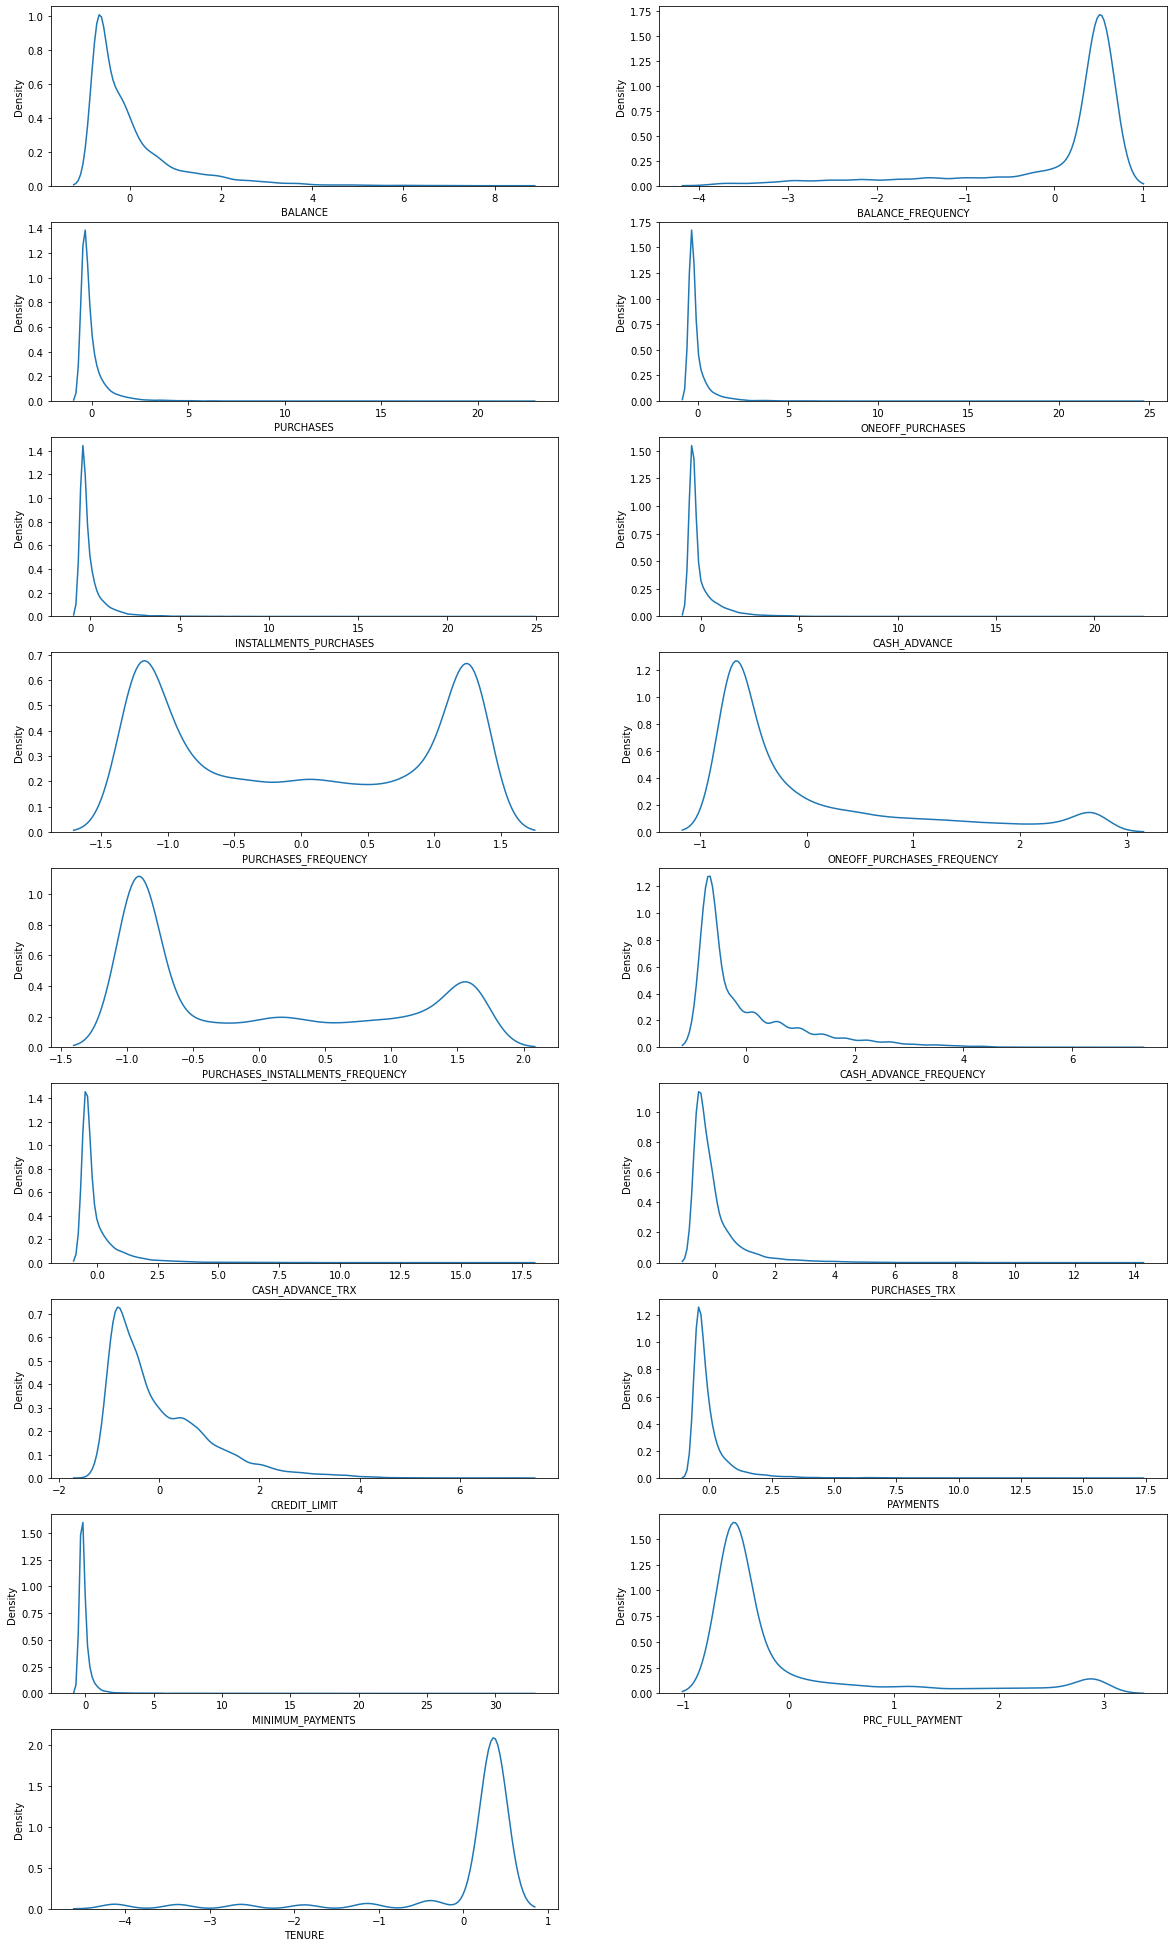

In [30]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df_scaled.columns):
    if df_scaled[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df_scaled[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

### **Interpretation**

Although there is still skewness in the data, by standardizing, we have minimized the scale of each feature so that it can have a mean = 0 and std = 1.

## **Dimensionality reduction (PCA)**

In [31]:
pca = PCA(random_state=0)
pca.fit(df_scaled)

PCA(random_state=0)

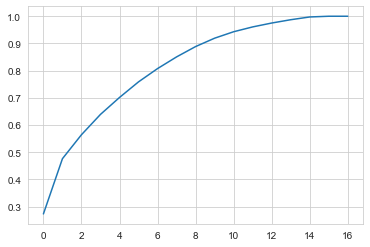

In [32]:
sns.set_style('whitegrid')
plt.plot(pca.explained_variance_ratio_.cumsum())

([<matplotlib.axis.XTick at 0x28b0abf72e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

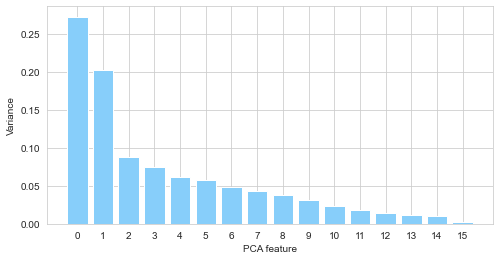

In [63]:
# Variance explained with the number of features
pca = PCA(random_state=0)
pca.fit(df_scaled)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:16], pca.explained_variance_ratio_[:16], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:16])

In [34]:
pca.explained_variance_ratio_[0:2].sum()

0.476095230324603

In [35]:
pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(df_scaled)

## **K-Means clustering**

### **Elbow method**

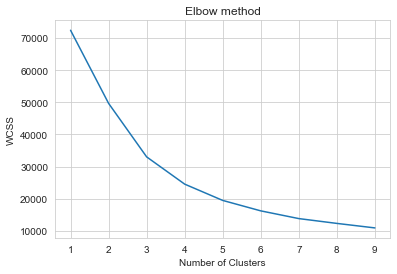

In [36]:
kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(X) for k in range (1, 10)]
inertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), inertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

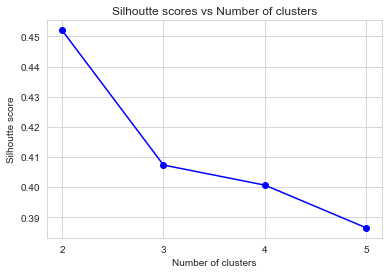

In [37]:
silhoutte_scores = [silhouette_score(X, model.labels_) for model in kmeans_models[2:6]]
plt.plot(range(2, 6), silhoutte_scores, 'bo-')
plt.xticks([2, 3, 4, 5])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')

### **Silhouette method**

In [38]:
kmeans = KMeans(random_state=0)
kmeans.fit(X)

KMeans(random_state=0)

In [39]:
labels = kmeans.labels_
silhouette_score(X, labels, metric = 'euclidean', random_state=0)

0.39331409157455127

In [40]:
silhouette_scores = []
number_of_cluster = range(2, 11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X, labels, metric = 'euclidean', random_state=0))

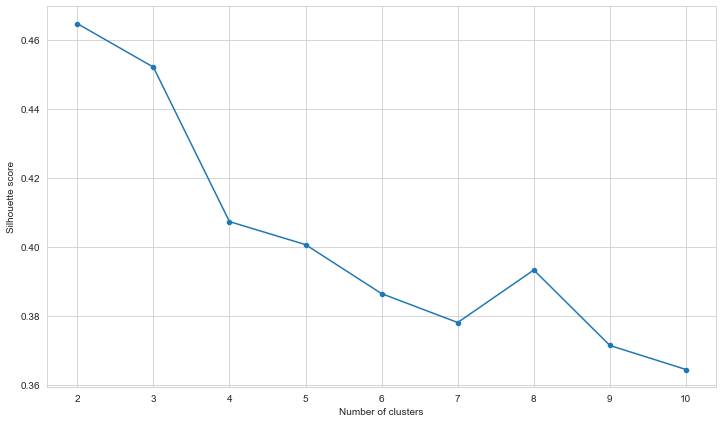

In [41]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [42]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

In [43]:
pca_df = pd.DataFrame(data=X, columns=['PC1', 'PC2'])
pca_df['labels'] = labels
pca_df.head()

,PC1,PC2,labels
0,-1.683768,-1.072565,0
1,-1.134848,2.508751,0
2,0.969058,-0.383505,0
3,-0.888423,0.004412,0
4,-1.600262,-0.684050,0


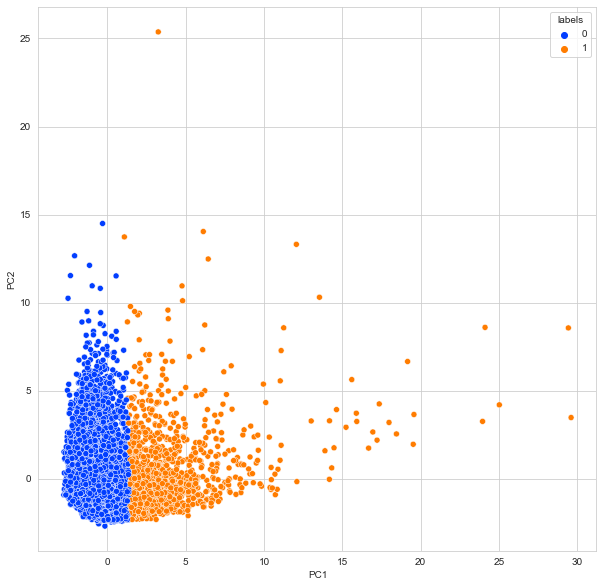

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='PC1', y='PC2', hue='labels', data=pca_df, palette='bright');

### **Interpretation**

If we use PCA for clustering, of course the model results become more difficult to interpret because the principal component is simply a combination of various features. For the Creditcard dataset and the results of the processing that has been done, it is found that the best number of clusters for n_components=2 is 2 clusters.

There is still much that can be improvised in order to get a higher variance value for the first 2 principal components, because the current results are only about 47% of the variance represented. This can be affected by the presence of outliers in the data.

## **Experiment**

In [45]:
# All data is transformed to the form of square root, then scaled using StandardScaler
df_sqrt = np.sqrt(df)

scaling = StandardScaler()
df_scaling = scaling.fit_transform(df_sqrt)

df_scaling = pd.DataFrame(df_scaling)
df_scaling.columns = df.columns

In [46]:
df_scaled['BALANCE'].skew()

2.393270481328753

In [47]:
df_scaling['BALANCE'].skew()

0.8294274734650835

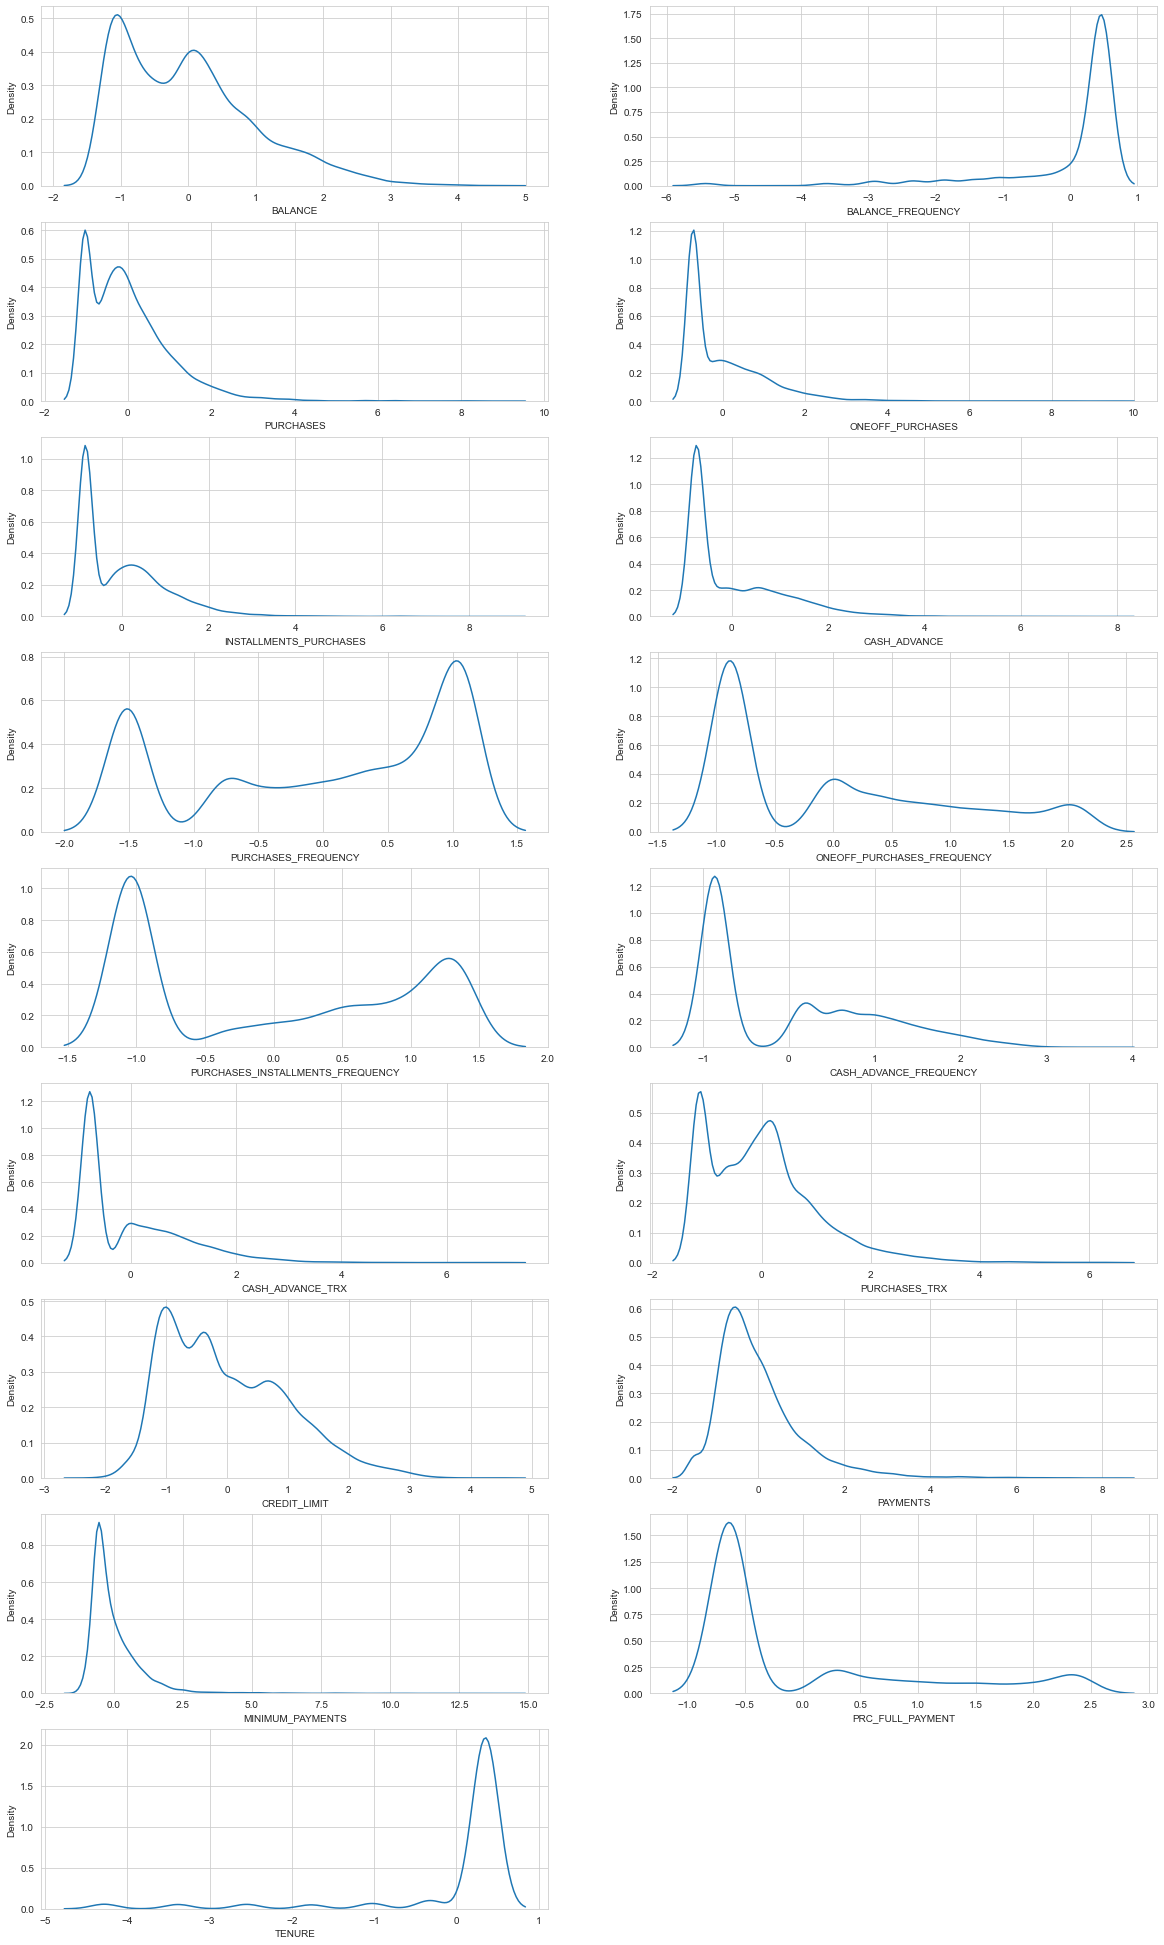

In [48]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df_scaling.columns):
    if df_scaling[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df_scaling[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [49]:
pca = PCA(random_state=0)
pca.fit(df_scaling)

PCA(random_state=0)

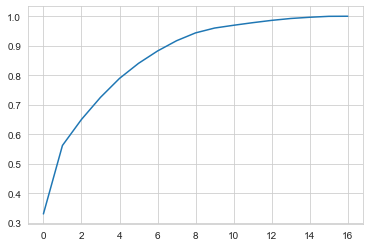

In [50]:
sns.set_style('whitegrid')
plt.plot(pca.explained_variance_ratio_.cumsum());

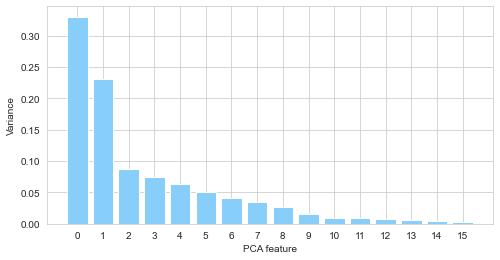

In [51]:
# Variance explained with the number of features
pca = PCA(random_state=0)
pca.fit(df_scaling)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:16], pca.explained_variance_ratio_[:16], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:16])

In [52]:
pca.explained_variance_ratio_[0:2].sum()

0.5622556831752383

In [53]:
pca = PCA(n_components=2, random_state=0)
X2 = pca.fit_transform(df_scaling)

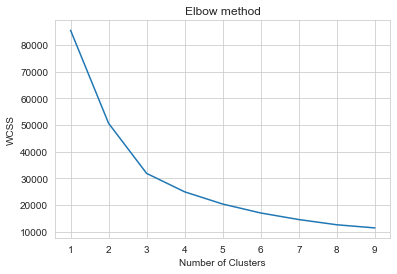

In [54]:
kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(X2) for k in range (1, 10)]
inertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), inertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

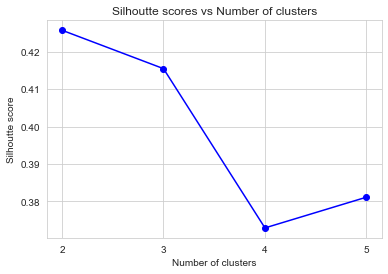

In [55]:
silhoutte_scores = [silhouette_score(X2, model.labels_) for model in kmeans_models[2:6]]
plt.plot(range(2, 6), silhoutte_scores, 'bo-')
plt.xticks([2, 3, 4, 5])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score');

In [56]:
kmeans = KMeans(random_state=0)
kmeans.fit(X2)

KMeans(random_state=0)

In [57]:
labels = kmeans.labels_
silhouette_score(X2, labels, metric = 'euclidean', random_state=0)

0.38062652864758423

In [58]:
silhouette_scores = []
number_of_cluster = range(2, 11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X2)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X2, labels, metric = 'euclidean', random_state=0))

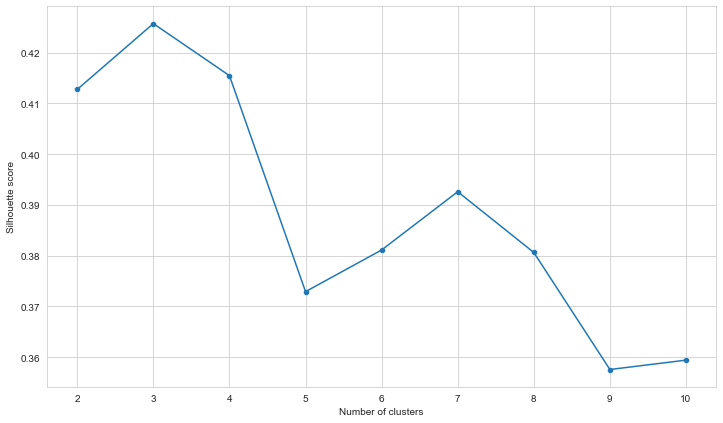

In [59]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [60]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X2)
labels = kmeans.labels_

In [61]:
pca_df = pd.DataFrame(data=X2, columns=['PC1', 'PC2'])
pca_df['labels'] = labels
pca_df.head()

,PC1,PC2,labels
0,-0.893102,-2.470296,0
1,-2.997217,2.030083,2
2,1.191889,0.386961,0
3,-0.771674,0.015639,2
4,-1.271139,-1.578252,0


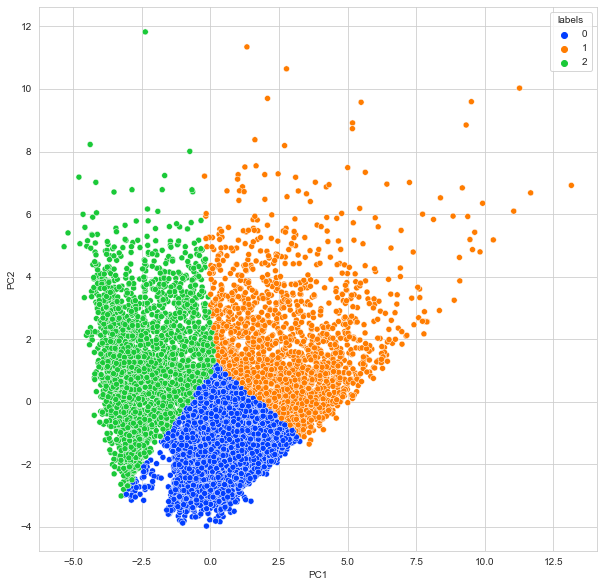

In [62]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='PC1', y='PC2', hue='labels', data=pca_df, palette='bright')